Problem Statement

● A sizable department has to be maintained, for the purposes of recruiting new talent.

● More often than not, the new employees have to be trained for the job and/or given time to acclimatize themselves to the company.

● Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition.

● In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay.

● Also, they want to know which of these variables is most important and needs to be addressed right away.


#Importing required packages and loading the dataset as a dataframe using pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
dataset=pd.read_csv("general_data.csv")
dataset.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


#Droping the null values if any from the loaded dataset.

In [2]:
dataset1=dataset.dropna()
dataset1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,2,Human Resources,Single,35390,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2


In [4]:
# Removing duplicated rows
dataset = dataset.drop_duplicates()

In [5]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
dataset.describe

<bound method NDFrame.describe of       Age Attrition  ... YearsSinceLastPromotion YearsWithCurrManager
0      51        No  ...                       0                    0
1      31       Yes  ...                       1                    4
2      32        No  ...                       0                    3
3      38        No  ...                       7                    5
4      32        No  ...                       0                    4
...   ...       ...  ...                     ...                  ...
4405   42        No  ...                       0                    2
4406   29        No  ...                       0                    2
4407   25        No  ...                       1                    2
4408   42        No  ...                       7                    8
4409   40        No  ...                       3                    9

[4410 rows x 24 columns]>

In [7]:
dataset2 = dataset

In [8]:
dataset_Yes = dataset[dataset["Attrition"] == "Yes"]
dataset_Yes

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,2,Sales Executive,Single,58130,2.0,Y,20,8,1,5.0,2,0,0,0
13,47,Yes,Non-Travel,Research & Development,1,1,Medical,1,14,Male,1,Research Scientist,Married,57620,1.0,Y,11,8,2,10.0,4,10,9,9
28,44,Yes,Travel_Frequently,Research & Development,1,2,Medical,1,29,Male,2,Research Scientist,Divorced,103330,3.0,Y,14,8,1,19.0,2,1,0,0
30,26,Yes,Travel_Rarely,Research & Development,4,3,Medical,1,31,Male,3,Research Scientist,Divorced,68540,2.0,Y,11,8,0,5.0,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,29,Yes,Travel_Rarely,Research & Development,7,1,Life Sciences,1,4382,Female,1,Research Scientist,Single,21800,1.0,Y,21,8,0,4.0,2,4,0,1
4386,33,Yes,Travel_Rarely,Sales,11,4,Marketing,1,4387,Male,1,Research Scientist,Married,71400,5.0,Y,21,8,0,8.0,2,5,0,4
4388,33,Yes,Travel_Rarely,Sales,1,3,Life Sciences,1,4389,Male,2,Manager,Married,51470,7.0,Y,11,8,0,13.0,2,9,1,7
4391,32,Yes,Travel_Rarely,Sales,23,1,Life Sciences,1,4392,Male,3,Healthcare Representative,Single,24680,0.0,Y,11,8,0,4.0,2,3,1,2


In [9]:
dataset_No = dataset[dataset["Attrition"] == "No"]
dataset_No

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,4,Research Director,Married,40710,3.0,Y,13,8,0,28.0,5,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8


Points to be noted

In the above data set we have few columns whose mean, median, mode calculations are not required at all, such columns include-

1) 8 columns that stores categoorical data.

2) Columns that have constant value for each record and doesn't show any variation in the stored data like, 'StandardHours' and 'EmployeeCount' column.

#Computing mean of specified columns.

In [10]:
dataset2[["Age","DistanceFromHome","JobLevel","MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager"]].mean()

Age                           36.923810
DistanceFromHome               9.192517
JobLevel                       2.063946
MonthlyIncome              65029.312925
NumCompaniesWorked             2.694830
PercentSalaryHike             15.209524
StockOptionLevel               0.793878
TotalWorkingYears             11.279936
TrainingTimesLastYear          2.799320
YearsAtCompany                 7.008163
YearsSinceLastPromotion        2.187755
YearsWithCurrManager           4.123129
dtype: float64

Computing mode of specified columns.

In [11]:
dataset2[["Age","DistanceFromHome","JobLevel","MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager"]].mode()

,Age,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,2,1,23420,1.0,11,0,10.0,2,5,0,2


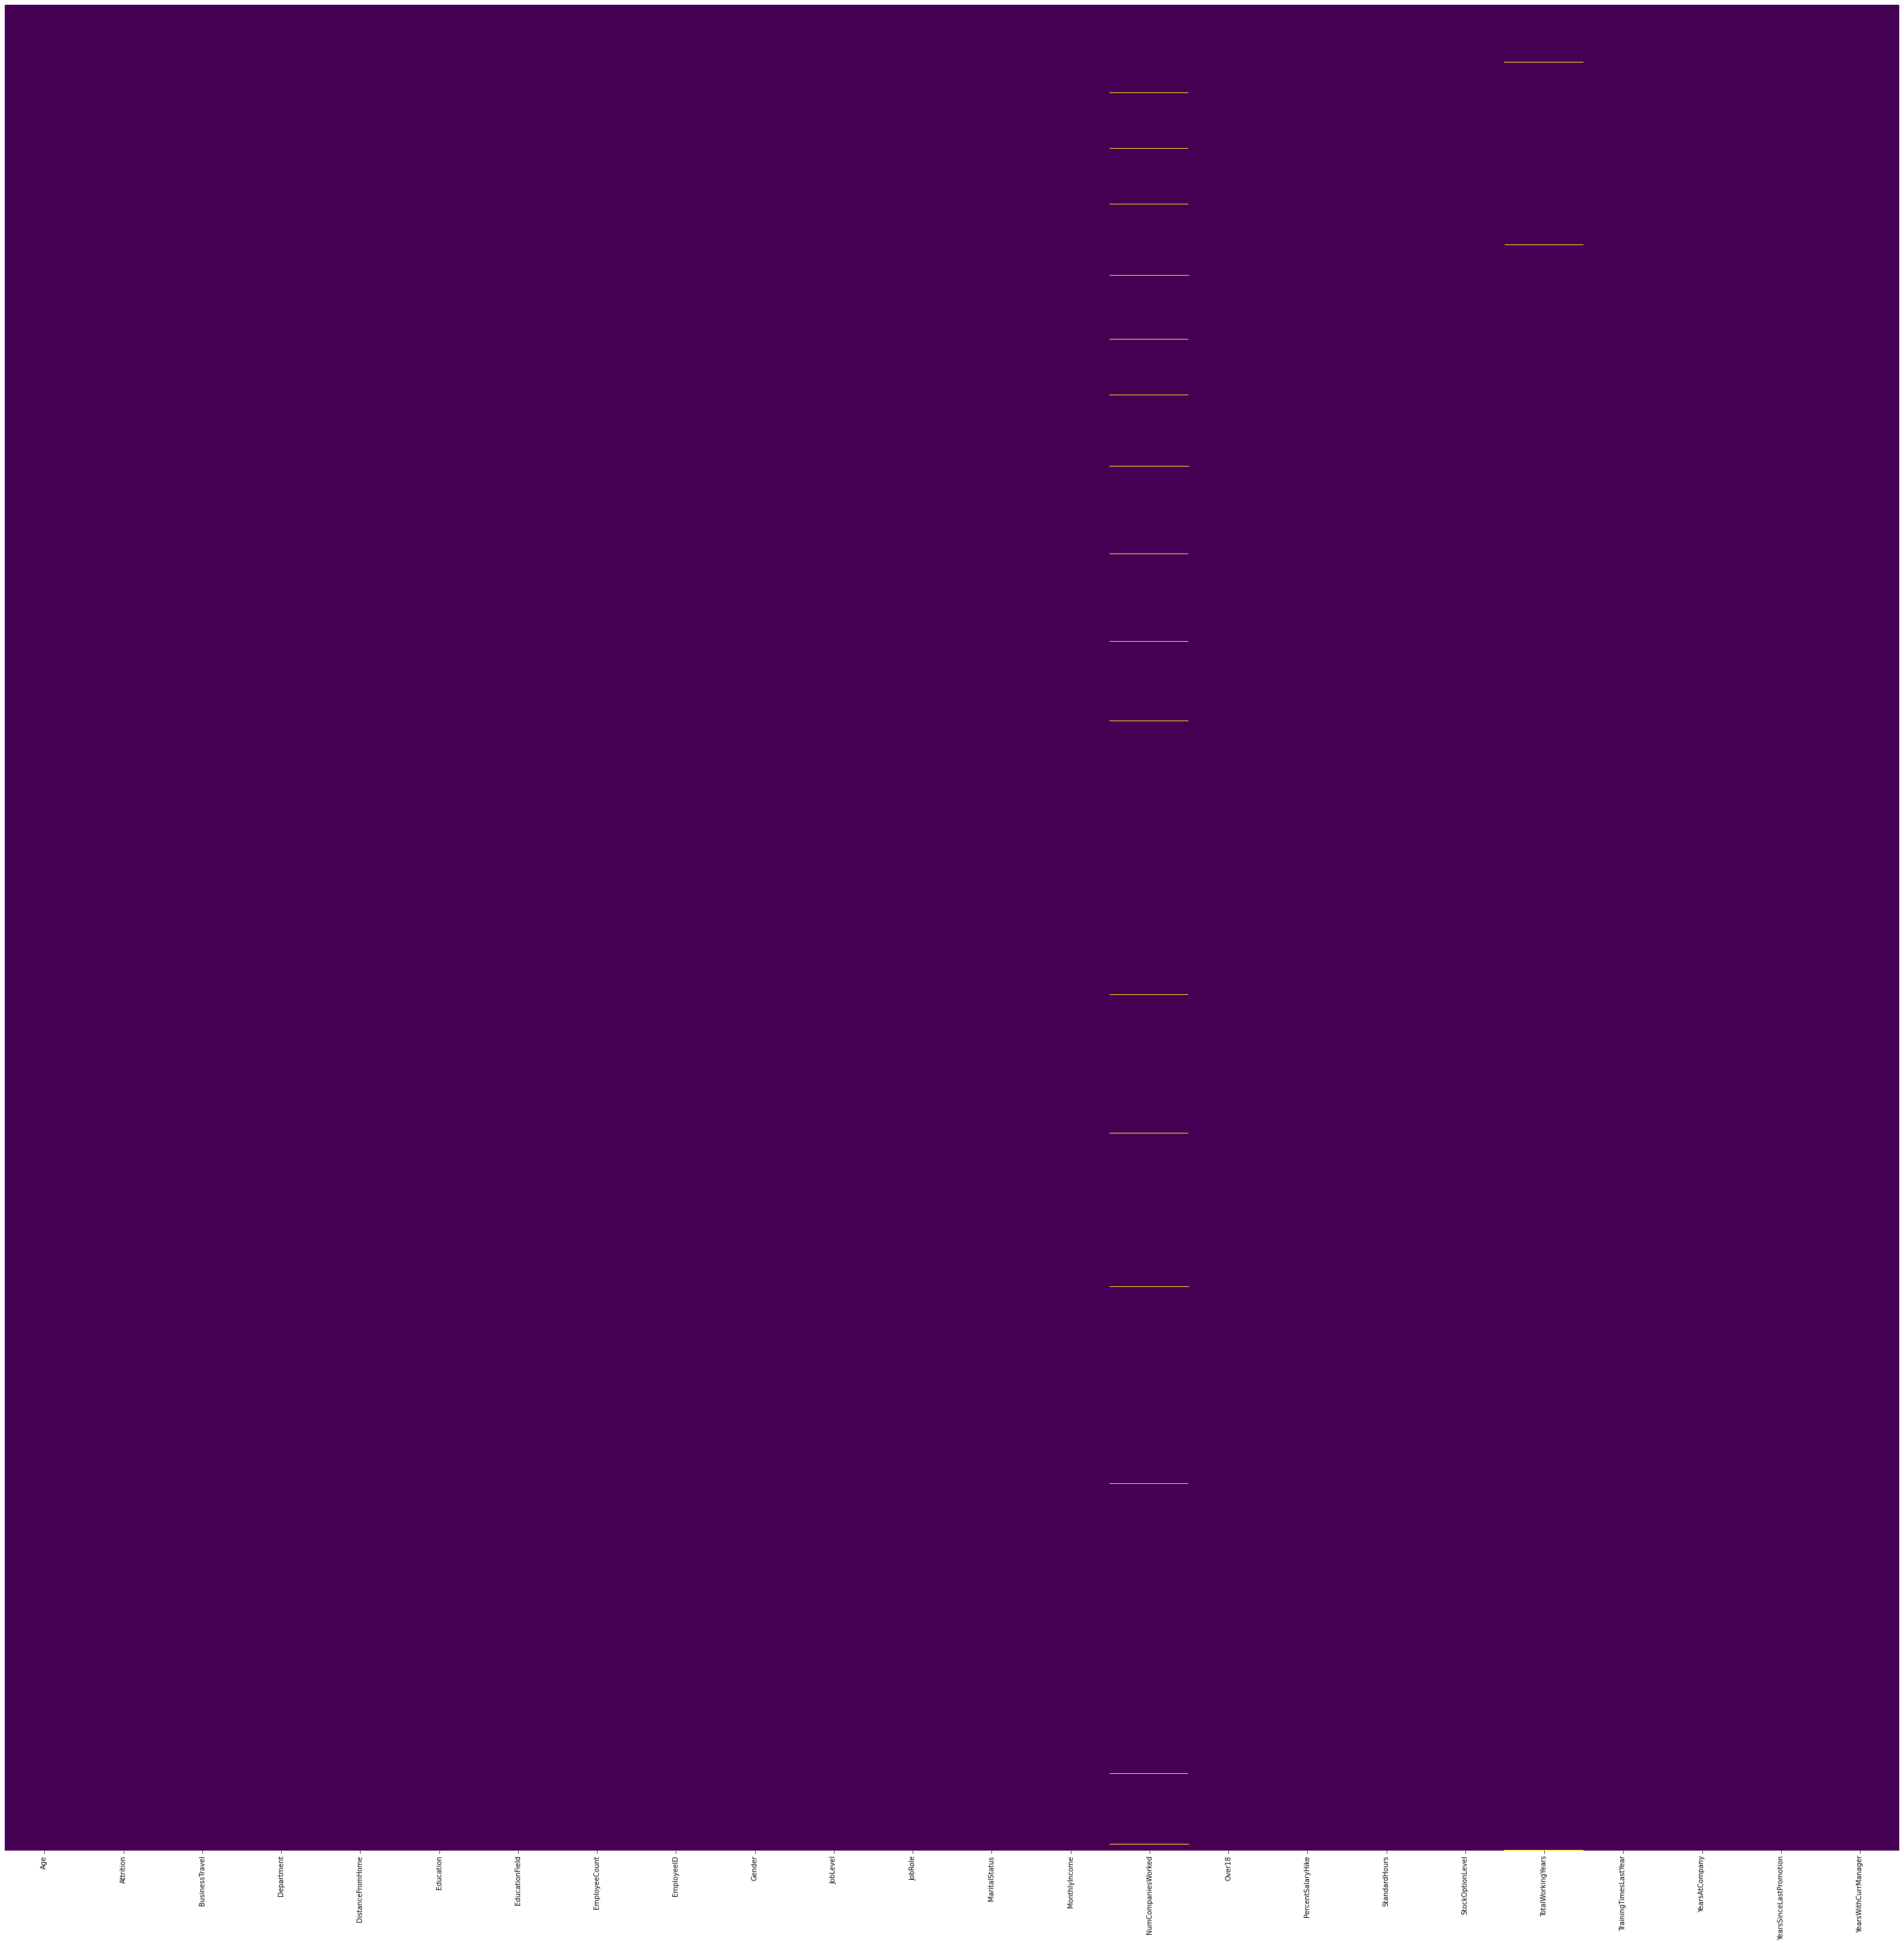

In [15]:
#data.drop(['EmployeeCount','EmployeeID','StandardHours','Over18','NumCompaniesWorked','TotalWorkingYears'],axis=1, inplace = True)
plt.figure(figsize=(50,50)) #plt is the object of matplot lib and .figure() is used to show or change properties of graphs
sns.heatmap(dataset.isnull(),cmap='viridis',yticklabels=False,cbar=False) #heatmaps are matrix plots which can visualize data in 2D
plt.show()

In [16]:
dataset.fillna(0,inplace=True)

In [17]:
dataset.drop(['EmployeeCount','EmployeeID','StandardHours','Over18','NumCompaniesWorked','TotalWorkingYears'],axis=1, inplace = True)

In [18]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'PercentSalaryHike',
       'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [20]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'PercentSalaryHike',
       'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [21]:
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,11,0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,23,1,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,15,3,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,11,3,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,12,2,2,6,0,4


In [22]:
dataset_corr = dataset[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome',
       'PercentSalaryHike', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

In [23]:
corr=dataset_corr.corr()
corr

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.006963,-0.035706,-0.002884,-0.044314,-0.033137,-0.031753,-0.027308,0.311309,0.216513,0.202089
DistanceFromHome,0.006963,1.000000,-0.008638,-0.037329,-0.021607,0.038125,0.011169,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.008638,1.000000,0.045746,0.006410,-0.040531,0.001261,0.010472,0.006080,0.022490,0.005358
JobLevel,-0.002884,-0.037329,0.045746,1.000000,0.047316,0.010973,0.000993,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.021607,0.006410,0.047316,1.000000,0.004325,0.026930,0.050112,0.000995,0.065219,0.024304
PercentSalaryHike,-0.033137,0.038125,-0.040531,0.010973,0.004325,1.000000,0.012548,-0.037392,-0.029707,-0.029542,-0.040864
StockOptionLevel,-0.031753,0.011169,0.001261,0.000993,0.026930,0.012548,1.000000,-0.069902,0.007886,0.019063,0.017757
TrainingTimesLastYear,-0.027308,-0.009001,0.010472,-0.032500,0.050112,-0.037392,-0.069902,1.000000,-0.007894,0.016121,-0.013270
YearsAtCompany,0.311309,0.031684,0.006080,-0.064219,0.000995,-0.029707,0.007886,-0.007894,1.000000,0.618409,0.769212
YearsSinceLastPromotion,0.216513,0.002290,0.022490,-0.060811,0.065219,-0.029542,0.019063,0.016121,0.618409,1.000000,0.510224


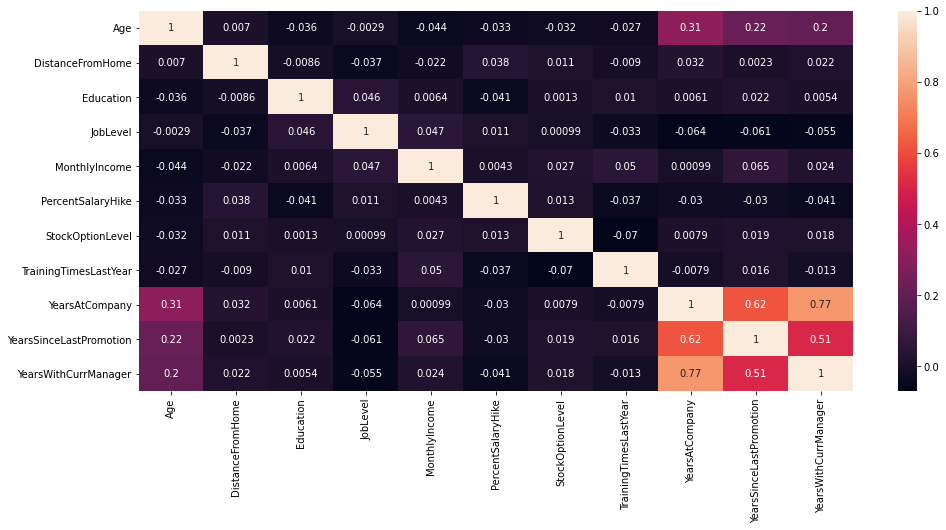

In [24]:
f,ax = plt.subplots(figsize=(16, 7))
sns.heatmap(corr, annot=True)
plt.show()

No     0.84
Yes    0.16
Name: Attrition, dtype: float64


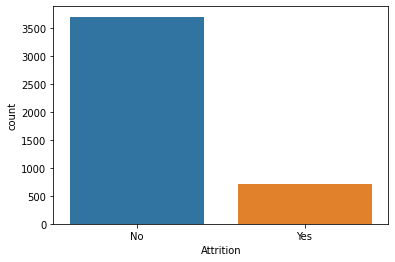

In [25]:
print(round(dataset['Attrition'].value_counts(normalize = True),2))
sns.countplot(x='Attrition',data=dataset)

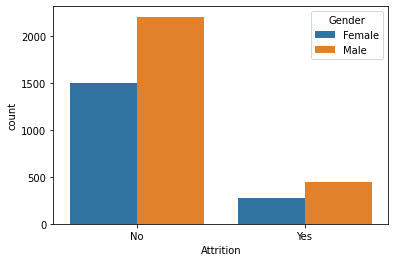

In [26]:
sns.countplot(x = "Attrition",data=dataset,hue="Gender")
#plt.scatter(dataset['Attrition'], data=dataset,hue="Gender")
#sns.catplot(x="Attrition", y=dataset, data=dataset)
#sns.boxplot(x="Attrition", y="Gender", data=dataset)

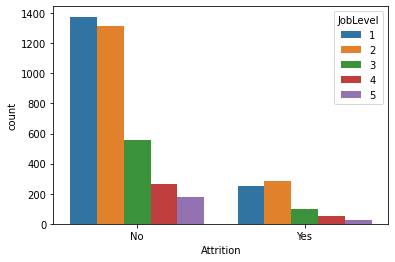

In [27]:
sns.countplot(x = "Attrition",data=dataset,hue="JobLevel")

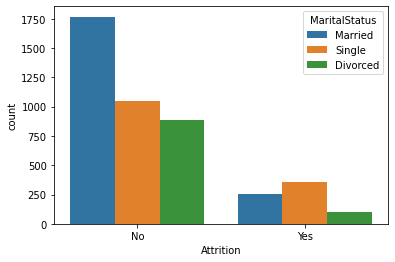

In [29]:
sns.countplot(x = "Attrition",data=dataset,hue="MaritalStatus")

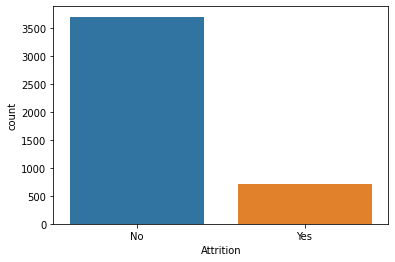

In [30]:
sns.countplot(x = "Attrition",data=dataset)
plt.show()

In [32]:
dataset.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
PercentSalaryHike          False
StockOptionLevel           False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [38]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
dataset['BusinessTravel'] = labelEncoder_X.fit_transform(dataset['BusinessTravel'])
dataset['Department'] = labelEncoder_X.fit_transform(dataset['Department'])
dataset['EducationField'] = labelEncoder_X.fit_transform(dataset['EducationField'])
dataset['Gender'] = labelEncoder_X.fit_transform(dataset['Gender'])
dataset['JobRole'] = labelEncoder_X.fit_transform(dataset['JobRole'])
dataset['MaritalStatus'] = labelEncoder_X.fit_transform(dataset['MaritalStatus'])


In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder_y=LabelEncoder()
dataset['Attrition']=label_encoder_y.fit_transform(dataset['Attrition'])

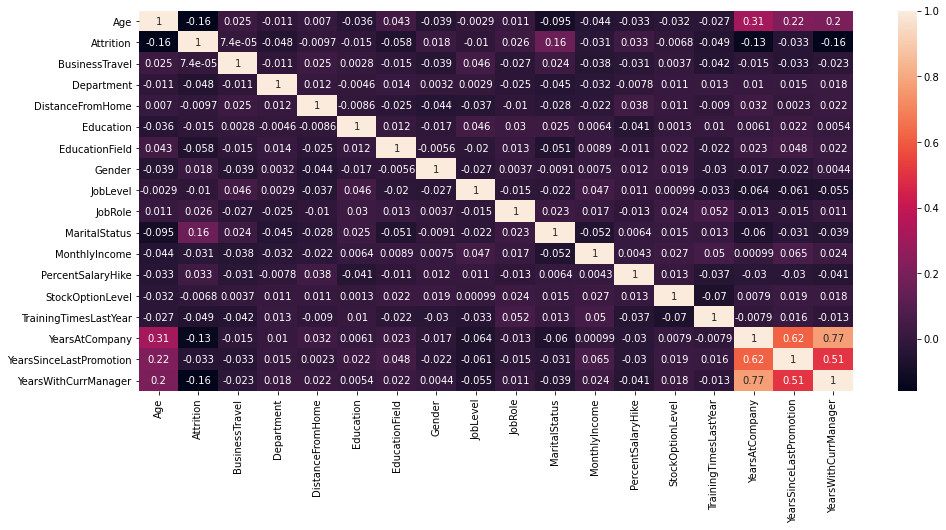

In [40]:
f,ax = plt.subplots(figsize=(16, 7))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

In [41]:
dataset.corr()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,-0.010846,0.006963,-0.035706,0.043194,-0.039352,-0.002884,0.011422,-0.095029,-0.044314,-0.033137,-0.031753,-0.027308,0.311309,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.048206,-0.009730,-0.015111,-0.057940,0.018125,-0.010290,0.025809,0.162070,-0.031176,0.032533,-0.006839,-0.049431,-0.134392,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.010982,0.024616,0.002755,-0.015462,-0.039243,0.046111,-0.027194,0.024001,-0.037597,-0.031054,0.003683,-0.041888,-0.014575,-0.032591,-0.022636
Department,-0.010846,-0.048206,-0.010982,1.000000,0.012134,-0.004597,0.013720,0.003158,0.002923,-0.025466,-0.044619,-0.032237,-0.007840,0.010512,0.012866,0.010078,0.014845,0.018016
DistanceFromHome,0.006963,-0.009730,0.024616,0.012134,1.000000,-0.008638,-0.024665,-0.044173,-0.037329,-0.010293,-0.027893,-0.021607,0.038125,0.011169,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.015111,0.002755,-0.004597,-0.008638,1.000000,0.012329,-0.016547,0.045746,0.030155,0.024991,0.006410,-0.040531,0.001261,0.010472,0.006080,0.022490,0.005358
EducationField,0.043194,-0.057940,-0.015462,0.013720,-0.024665,0.012329,1.000000,-0.005634,-0.019528,0.013106,-0.051409,0.008858,-0.011214,0.021620,-0.021793,0.023120,0.048181,0.021664
Gender,-0.039352,0.018125,-0.039243,0.003158,-0.044173,-0.016547,-0.005634,1.000000,-0.026854,0.003724,-0.009132,0.007530,0.011841,0.019237,-0.030167,-0.017277,-0.021812,0.004438
JobLevel,-0.002884,-0.010290,0.046111,0.002923,-0.037329,0.045746,-0.019528,-0.026854,1.000000,-0.014763,-0.022021,0.047316,0.010973,0.000993,-0.032500,-0.064219,-0.060811,-0.055251
JobRole,0.011422,0.025809,-0.027194,-0.025466,-0.010293,0.030155,0.013106,0.003724,-0.014763,1.000000,0.022888,0.017072,-0.013465,0.023991,0.051744,-0.012886,-0.014635,0.010695


In [42]:
y=dataset['Attrition']
x=dataset.drop('Attrition',axis=1)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [46]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [47]:
print(accuracy_score(y_test,y_pred))

0.8367346938775511


In [50]:
log_score = cross_val_score(estimator=LogisticRegression(), X=X_test, y=y_test, cv=5) 

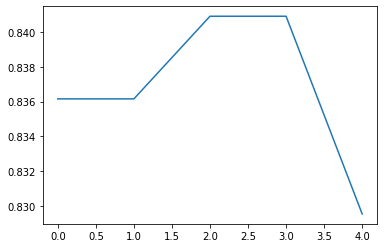

In [51]:
plt.plot(log_score)

In [52]:
log_score

array([0.83615819, 0.83615819, 0.84090909, 0.84090909, 0.82954545])

In [53]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3087, 17) (1323, 17) (3087,) (1323,)


In [55]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
clf = DecisionTreeClassifier(random_state=42)
#clf.fit(X_train, y_train)
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=10)
bag_clf.fit(X_train, y_train)
bag_clf.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [62]:
def kpi_metrics(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        return pd.DataFrame(res)
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))
        
        res = cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        return pd.DataFrame(res)
        

In [63]:
import numpy as np
kpi_metrics(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9994

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2588
           1       1.00      1.00      1.00       499

    accuracy                           1.00      3087
   macro avg       1.00      1.00      1.00      3087
weighted avg       1.00      1.00      1.00      3087


Confusion Matrix: 
 [[2588    0]
 [   2  497]]

Average Accuracy: 	 0.9702
Accuracy SD: 		 0.0060


,0
0,0.967638
1,0.974110
2,0.970874
3,0.980583
4,0.977346
5,0.964401
6,0.967638
7,0.961039
8,0.964286
9,0.974026


In [64]:
kpi_metrics(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.9788

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1111
           1       0.98      0.88      0.93       212

    accuracy                           0.98      1323
   macro avg       0.98      0.94      0.96      1323
weighted avg       0.98      0.98      0.98      1323


Confusion Matrix: 
 [[1108    3]
 [  25  187]]

Average Accuracy: 	 0.9063
Accuracy SD: 		 0.0166


,0
0,0.917293
1,0.917293
2,0.879699
3,0.901515
4,0.893939
5,0.924242
6,0.893939
7,0.931818
8,0.916667
9,0.886364
